# __Income Prediction Challenge__

## Business Understanding

__Problem Statement__

Income inequality - when income is distributed in an uneven manner among a population - is a growing problem in developing nations across the world. With the rapid rise of AI and worker automation, this problem could continue to grow if steps are not taken to address the issue.

The objective of this challenge is to create a machine learning model to predict whether an individual earns above or below a certain amount.
This solution can potentially reduce the cost and improve the accuracy of monitoring key population indicators such as income level in between census years. This information will help policymakers to better manage and avoid income inequality globally.


### Objectives
- Develop a predictive model to categorize individuals based on income levels.
- Reduce the cost and improve the accuracy of monitoring key population indicators.
- Assist policymakers in managing and mitigating global income inequality.

## Data Understanding

### Data Collection
- Identify and acquire relevant datasets containing information on income and related features.
- Explore datasets capturing socio-economic factors, education, employment, and demographic information.

### Data Exploration
- Examine the structure of the dataset to understand its features and variables.
- Identify missing values, outliers, and potential data quality issues.
- Perform descriptive statistics to gain initial insights into the data.

## Data Preparation

### Data Cleaning
- Address missing values, outliers, and data quality issues to ensure data integrity.
- Standardize and normalize features as necessary.

### Feature Engineering
- Create new features that may enhance the predictive power of the model.
- Encode categorical variables and standardize numerical features.

## Modeling

### Model Selection
- Choose appropriate machine learning algorithms for binary classification.
- Consider algorithms such as Decision Trees, Random Forest, Support Vector Machines, or Gradient Boosting.

### Model Training
- Split the dataset into training and testing sets.
- Train the selected models using the training data.

### Model Evaluation
- Evaluate model performance using metrics such as accuracy, precision, recall, and F1 score.
- Fine-tune hyperparameters to optimize the model.

## Evaluation

### Model Interpretation
- Interpret the results to understand the factors influencing predictions.
- Identify the most significant features contributing to the prediction of income levels.

### Deployment
- Deploy the trained model for real-time predictions on new data.
- Integrate the model into a system accessible to policymakers for monitoring.

## Conclusion

### Lessons Learned
- Document challenges encountered during the project.
- Reflect on insights gained from data exploration and modeling.

### Recommendations
- Provide recommendations for ongoing monitoring and potential improvements.

By following the CRISP-DM framework, this project aims to develop a robust machine learning model to predict income levels, contributing to the global effort to manage and reduce income inequality.


## Import required modules

In [82]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Statistical Tests
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder

# Data Splitting and Sampling
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
#from imblearn.over_sampling import RandomOverSampler

# Machine Learning Models
from catboost import CatBoostClassifier

# Model Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report

# Model saving/export
import pickle

# Miscellaneous
from termcolor import colored
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

## __Data Understanding__

### Load Datasets

In [2]:
df_var = pd.read_csv('Data/VariableDefinitions.csv')
df_var

,Column,Description
0,age,Age Of Individual
1,gender,Gender
2,education,Education
3,class,Class Of Worker
4,education_institute,Enrolled Educational Institution in last week
5,marital_status,Marital_Status
6,race,Race
7,is_hispanic,Hispanic Origin
8,employment_commitment,Full Or Part Time Employment Stat
9,unemployment_reason,Reason For Unemployment


__This definitions give a clear guidance and understanding on what to expect in each column__

In [3]:
# Reading train and test datasets
df = pd.read_csv('Data/Train.csv')
df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,NaN,0,0,NaN,52,0,Not in universe or children,0,NaN,2,Householder,Householder,NaN,NaN,2,Head of household,0,0,292,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,NaN,0,500,No,15,41,Hospital services,26,Adm support including clerical,4,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint both 65+,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [4]:
df_test= pd.read_csv('Data/Test.csv')
df_test.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record
0,ID_TZ209499,54,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,NaN,0,600,No,46,29,Transportation,38,Transportation and material moving,2,Householder,Householder,NaN,NaN,2,Joint both under 65,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3388.96
1,ID_TZ209500,53,Male,5th or 6th grade,Private,NaN,Married-civilian spouse present,White,Central or South American,Full-time schedules,NaN,0,0,NaN,52,5,Manufacturing-durable goods,37,Machine operators assmblrs & inspctrs,4,Householder,Householder,NaN,NaN,2,Joint both under 65,0,0,0,Foreign born- Not a citizen of U S,95,El-Salvador,El-Salvador,El-Salvador,?,?,?,?,NaN,NaN,NaN,1177.55
2,ID_TZ209501,42,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,NaN,1,0,NaN,44,37,Business and repair services,4,Professional specialty,5,Householder,Householder,NaN,NaN,2,Joint both under 65,15024,0,500,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,4898.55
3,ID_TZ209502,16,Female,9th grade,NaN,High school,Never married,White,All other,Children or Armed Forces,NaN,0,0,NaN,8,0,Not in universe or children,0,NaN,6,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1391.44
4,ID_TZ209503,16,Male,9th grade,NaN,High school,Never married,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,2,Nonfiler,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1933.18


# __Hypothesis__
Null Hypothesis (H0): There's no clear connection between how much education someone has and the chance of making more money than a certain amount.

Alternative Hypothesis (H1): People with more education are much more likely to earn above that certain amount.

The null hypothesis (H0) suggests that education and income aren't really linked. In simple terms, having more education doesn't necessarily mean you're more likely to earn above a specific income.

On the flip side, the alternative hypothesis (H1) says there is a clear link between education and income. It suggests that people with higher education levels are more likely to earn above the set income threshold.

Statistical tests will be used to figure out if there's enough evidence in our data to support either the idea that education and income aren't strongly connected or that they are.

# __Research Questions__

Certainly! The top 7 most effective questions for data analysis, considering relevance and potential impact, are:

1. **Income Distribution Overview:**
   - What percentage of individuals in the dataset have incomes above $50,000, and conversely, what percentage have incomes below $50,000? This provides a foundational understanding of the income distribution.

2. **Age and Income Correlation:**
   - How does age correlate with income levels in the dataset? Are older individuals more likely to have higher incomes? This explores the relationship between age and income, uncovering potential trends.

3. **Education and Income Link:**
   - Do higher education levels correspond to a higher likelihood of having incomes above the specified threshold? Investigating the impact of education on income levels can reveal valuable insights.

4. **Occupation and Income Relationship:**
   - What is the relationship between occupation and income categories in the dataset? This question delves into the influence of occupation on income, which can be crucial for understanding career-related income dynamics.

5. **Gender-Based Income Disparity:**
   - Is there a significant gender-based income disparity in the dataset? Analyzing gender-based income differences is a critical societal aspect, making this question impactful for social and economic insights.

6. **Employment Status Differences:**
   - Are there differences in employment status between the two income groups (above and below $50,000)? Understanding employment status variations in different income brackets can shed light on economic disparities.

7. **Race and Ethnicity Analysis:**
   - How do race and ethnicity correlate with income levels in the dataset? Examining the relationship between race/ethnicity and income contributes to discussions on diversity, equity, and inclusion.

These questions cover a diverse range of factors, including demographics, education, occupation, and societal aspects, providing a comprehensive approach to understanding income dynamics in the dataset.

1. **Income Distribution:**
   - What percentage of individuals in the dataset have incomes above $50,000, and conversely, what percentage have incomes below $50,000?

2. **Age and Income:**
   - How does age correlate with income levels in the dataset? Are older individuals more likely to have higher incomes?

3. **Self-Employment and Income:**
   - Are self-employed individuals more likely to have higher incomes compared to those working for employers?

4. **Income Distribution Among Unemployed:**
   - What is the income distribution among unemployed individuals in the dataset?

5. **Education and Income:**
   - Do higher education levels correspond to a higher likelihood of having incomes above the specified threshold?

6. **Age and Income Relationship:**
   - How does age relate to income levels in the dataset? Is there a trend suggesting that older individuals have higher incomes?

7. **Gender-Based Income Disparity:**
   - Is there a significant gender-based income disparity in the dataset?

8. **Employment Status and Income:**
   - Are there differences in employment status between the two income groups (above and below $50,000)?

9. **Race and Ethnicity Correlation:**
   - How do race and ethnicity correlate with income levels in the dataset?

10. **Citizenship Status and Income:**
    - Is citizenship status associated with income levels in the dataset?

11. **Occupation and Income:**
    - What is the relationship between occupation and income categories in the dataset?

12. **Tax Status and Income:**
    - How does tax status correspond to income levels in the dataset?

These questions cover a variety of aspects, including demographics, employment status, education, and specific demographic groups' income distributions. Analyzing these questions can provide insights into the factors influencing income levels in the dataset.

# __EDA__

## Train  & Test Dataset

In [5]:
# Shape of the datasets
df.shape , df_test.shape

((209499, 43), (89786, 42))

In [6]:
# General info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [7]:
# General info of the dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89786 entries, 0 to 89785
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              89786 non-null  object 
 1   age                             89786 non-null  int64  
 2   gender                          89786 non-null  object 
 3   education                       89786 non-null  object 
 4   class                           44707 non-null  object 
 5   education_institute             5616 non-null   object 
 6   marital_status                  89786 non-null  object 
 7   race                            89786 non-null  object 
 8   is_hispanic                     89786 non-null  object 
 9   employment_commitment           89786 non-null  object 
 10  unemployment_reason             2680 non-null   object 
 11  employment_stat                 89786 non-null  int64  
 12  wage_per_hour                   

In [8]:
# Statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,209499.0,34.518728,22.306738,0.00,15.00,33.00,50.00,90.0
employment_stat,209499.0,0.176760,0.555562,0.00,0.00,0.00,0.00,2.0
wage_per_hour,209499.0,55.433487,276.757327,0.00,0.00,0.00,0.00,9999.0
working_week_per_year,209499.0,23.158850,24.397963,0.00,0.00,8.00,52.00,52.0
industry_code,209499.0,15.332398,18.049655,0.00,0.00,0.00,33.00,51.0
occupation_code,209499.0,11.321734,14.460839,0.00,0.00,0.00,26.00,46.0
total_employed,209499.0,1.956067,2.365154,0.00,0.00,1.00,4.00,6.0
vet_benefit,209499.0,1.515854,0.850853,0.00,2.00,2.00,2.00,2.0
gains,209499.0,435.926887,4696.359500,0.00,0.00,0.00,0.00,99999.0
losses,209499.0,36.881737,270.383302,0.00,0.00,0.00,0.00,4608.0


In [9]:
# Statistical summary of the dataset
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,89786.0,34.586294,22.345868,0.00,15.000,33.000,50.000,90.0
employment_stat,89786.0,0.175762,0.554491,0.00,0.000,0.000,0.000,2.0
wage_per_hour,89786.0,54.338627,265.197545,0.00,0.000,0.000,0.000,9400.0
working_week_per_year,89786.0,23.223932,24.418207,0.00,0.000,8.000,52.000,52.0
industry_code,89786.0,15.377130,18.062988,0.00,0.000,0.000,33.000,51.0
occupation_code,89786.0,11.298432,14.444703,0.00,0.000,0.000,26.000,46.0
total_employed,89786.0,1.956419,2.364178,0.00,0.000,1.000,4.000,6.0
vet_benefit,89786.0,1.517998,0.849330,0.00,2.000,2.000,2.000,2.0
gains,89786.0,421.977925,4610.515599,0.00,0.000,0.000,0.000,99999.0
losses,89786.0,36.772648,268.401257,0.00,0.000,0.000,0.000,4608.0


This table summarizes the count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values for each feature in the dataset.

### Checking missing values

                                Missing values  Ratio
veterans_admin_questionnaire            207415  99.01
unemployment_reason                     202979  96.89
education_institute                     196197  93.65
old_residence_reg                       193148  92.20
old_residence_state                     193148  92.20
is_labor_union                          189420  90.42
under_18_family                         151654  72.39
residence_1_year_ago                    106284  50.73
occupation_code_main                    105694  50.45
class                                   105245  50.24
migration_prev_sunbelt                   88452  42.22
migration_code_change_in_msa              1588   0.76
migration_code_move_within_reg            1588   0.76
migration_code_change_in_reg              1588   0.76
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


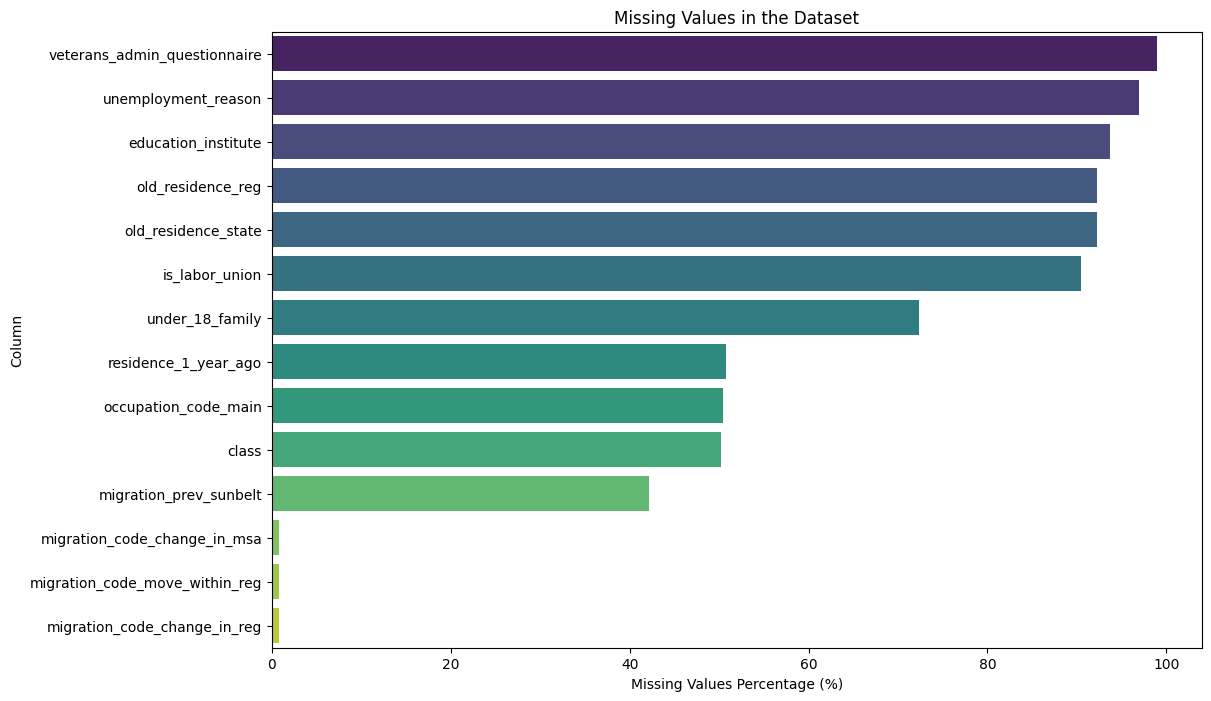

In [10]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum()>0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_,2)], axis=1,keys=["Missing values", "Ratio"])
    missing_df= pd.DataFrame(missing_df)
    print(missing_df)
    print('~'*100)

    plt.figure(figsize=(12, 8))
    #missing_df = missing_values_analysis(df)
    ax = sns.barplot(x="Ratio", y=missing_df.index, data=missing_df, palette="viridis")
    ax.set(xlabel="Missing Values Percentage (%)", ylabel="Column", 
        title=f"Missing Values in the Dataset")
    plt.show()
    
missing_values_analysis(df)    

                                Missing values  Ratio
veterans_admin_questionnaire             88859  98.97
unemployment_reason                      87106  97.02
education_institute                      84170  93.75
old_residence_reg                        82670  92.07
old_residence_state                      82670  92.07
is_labor_union                           81322  90.57
under_18_family                          64972  72.36
residence_1_year_ago                     45597  50.78
occupation_code_main                     45273  50.42
class                                    45079  50.21
migration_prev_sunbelt                   37724  42.02
migration_code_change_in_msa               651   0.73
migration_code_move_within_reg             651   0.73
migration_code_change_in_reg               651   0.73
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


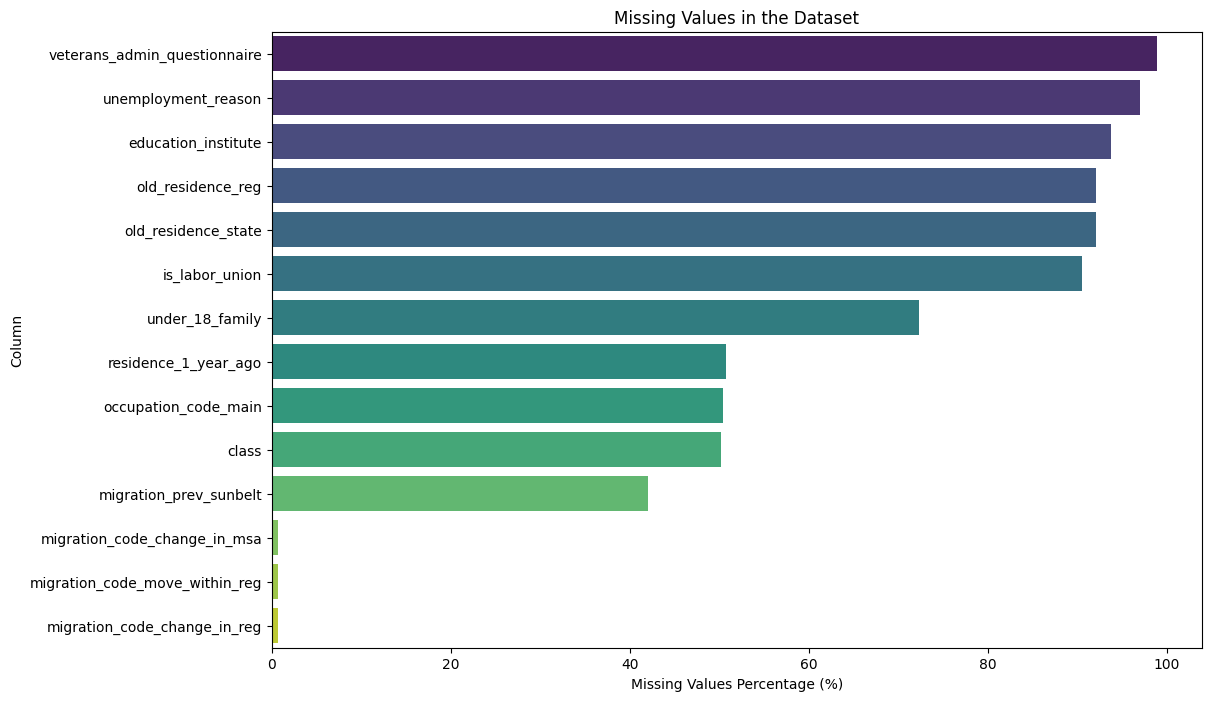

In [11]:
missing_values_analysis(df_test) 

In [12]:
# Define a function to print unique values for categorical columns
def print_unique_categorical(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if the column is of type 'object' (categorical)
            underline = '~' * len(f"Column: {column}")
            print(f"Column: {column}")
            print(underline)
            unique_values = df[column].unique()
            print(f"Unique Values: {unique_values}\n")
            
print_unique_categorical(df)

Column: ID
~~~~~~~~~~
Unique Values: ['ID_TZ0000' 'ID_TZ0001' 'ID_TZ0002' ... 'ID_TZ99997' 'ID_TZ99998'
 'ID_TZ99999']

Column: gender
~~~~~~~~~~~~~~
Unique Values: [' Female' ' Male']

Column: education
~~~~~~~~~~~~~~~~~
Unique Values: [' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)']

Column: class
~~~~~~~~~~~~~
Unique Values: [nan ' Federal government' ' Private' ' Local government'
 ' Self-employed-incorporated' ' Self-employed-not incorporated'
 ' State government' ' Without pay' ' Never worked']

Column: education_institute
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Unique Values: [nan ' High school

In [13]:
print_unique_categorical(df_test)

Column: ID
~~~~~~~~~~
Unique Values: ['ID_TZ209499' 'ID_TZ209500' 'ID_TZ209501' ... 'ID_TZ299282' 'ID_TZ299283'
 'ID_TZ299284']

Column: gender
~~~~~~~~~~~~~~
Unique Values: [' Male' ' Female']

Column: education
~~~~~~~~~~~~~~~~~
Unique Values: [' High school graduate' ' 5th or 6th grade' ' Bachelors degree(BA AB BS)'
 ' 9th grade' ' Children' ' Some college but no degree' ' 11th grade'
 ' 10th grade' ' 7th and 8th grade' ' Associates degree-occup /vocational'
 ' Masters degree(MA MS MEng MEd MSW MBA)' ' 12th grade no diploma'
 ' Associates degree-academic program' ' Less than 1st grade'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 1st 2nd 3rd or 4th grade'
 ' Doctorate degree(PhD EdD)']

Column: class
~~~~~~~~~~~~~
Unique Values: [' Private' nan ' Federal government' ' Local government'
 ' Self-employed-incorporated' ' Self-employed-not incorporated'
 ' State government' ' Never worked' ' Without pay']

Column: education_institute
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Unique Values: [nan ' Hig

## __Handling Data Inconsistencies__

In [14]:
def clean_strip(df):
    df = df.apply(lambda x : x.str.strip() if x.dtype == 'object' else x)
    df = df.replace('?', np.nan)
    return df
df = clean_strip(df)

In [15]:
df_test = clean_strip(df_test)

In [16]:
def identify_columns_to_drop(df, threshold=0.70):
    columns_to_drop = []
    for col in df.columns:
        missing_percentage = df[col].isnull().sum() / len(df)
        if missing_percentage > threshold:
            columns_to_drop.append(col)

    return columns_to_drop

result_train = identify_columns_to_drop(df)
print("Columns to drop in the train dataset:", result_train)

columns_to_drop = identify_columns_to_drop(df)
df.drop(columns=columns_to_drop, inplace=True)


Columns to drop in the train dataset: ['education_institute', 'unemployment_reason', 'is_labor_union', 'under_18_family', 'veterans_admin_questionnaire', 'migration_prev_sunbelt', 'old_residence_reg', 'old_residence_state']


In [17]:
result_test = identify_columns_to_drop(df_test)
print("Columns to drop in the train dataset:", result_test)

Columns to drop in the train dataset: ['education_institute', 'unemployment_reason', 'is_labor_union', 'under_18_family', 'veterans_admin_questionnaire', 'migration_prev_sunbelt', 'old_residence_reg', 'old_residence_state']


In [18]:
columns_to_drop = identify_columns_to_drop(df_test)
df_test.drop(columns=columns_to_drop, inplace=True)

In [19]:
df.head()

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,Widowed,White,All other,Not in labor force,0,0,52,0,Not in universe or children,0,NaN,2,Householder,Householder,2,Head of household,0,0,292,Native,95,US,US,US,NaN,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,Widowed,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,2,Single,0,0,0,Native,94,US,US,US,unchanged,unchanged,unchanged,Same,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,Never married,Black,All other,Children or Armed Forces,0,500,15,41,Hospital services,26,Adm support including clerical,4,Child 18+ never marr Not in a subfamily,Child 18 or older,2,Single,0,0,0,Native,94,US,US,US,unchanged,unchanged,unchanged,Same,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,unchanged,unchanged,Same,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,US,US,US,NaN,NaN,NaN,NaN,1580.79,Below limit


                                Missing values  Ratio
migration_code_change_in_msa            106284  50.73
migration_code_move_within_reg          106284  50.73
migration_code_change_in_reg            106284  50.73
residence_1_year_ago                    106284  50.73
occupation_code_main                    105694  50.45
class                                   105245  50.24
country_of_birth_father                   7181   3.43
country_of_birth_mother                   6516   3.11
country_of_birth_own                      3667   1.75
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


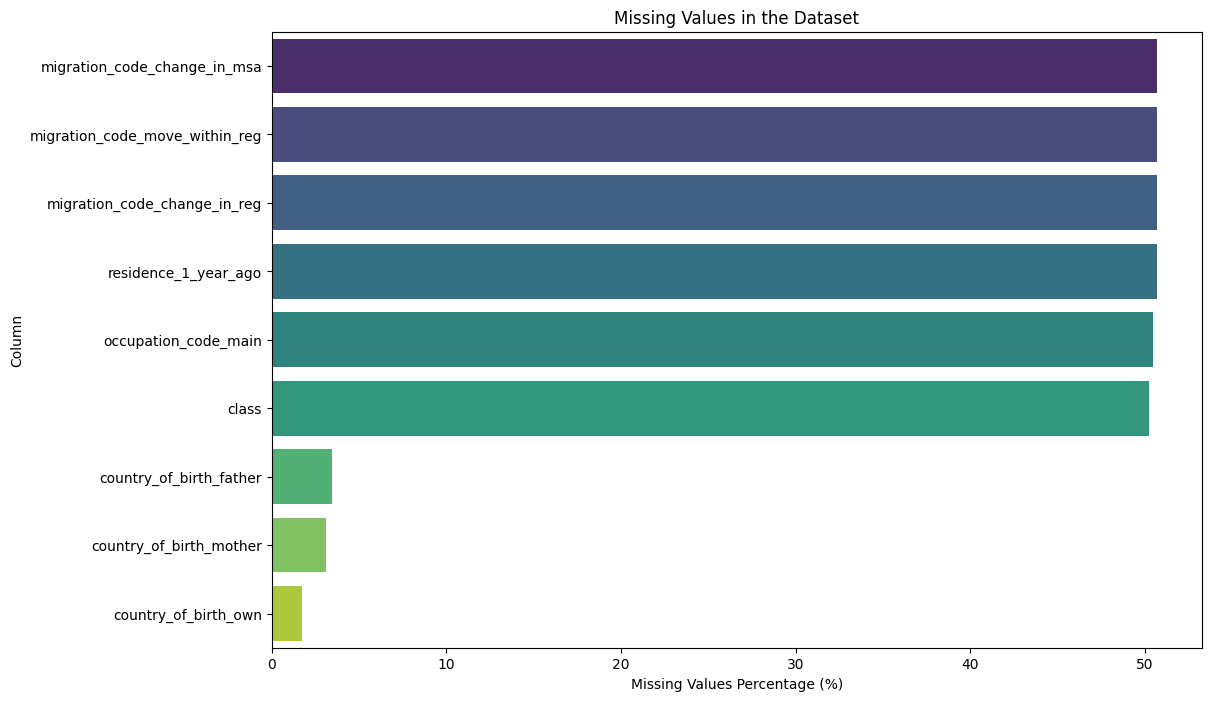

In [20]:
missing_values_analysis(df)

                                Missing values  Ratio
migration_code_change_in_msa             45597  50.78
migration_code_move_within_reg           45597  50.78
migration_code_change_in_reg             45597  50.78
residence_1_year_ago                     45597  50.78
occupation_code_main                     45273  50.42
class                                    45079  50.21
country_of_birth_father                   2961   3.30
country_of_birth_mother                   2675   2.98
country_of_birth_own                      1490   1.66
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


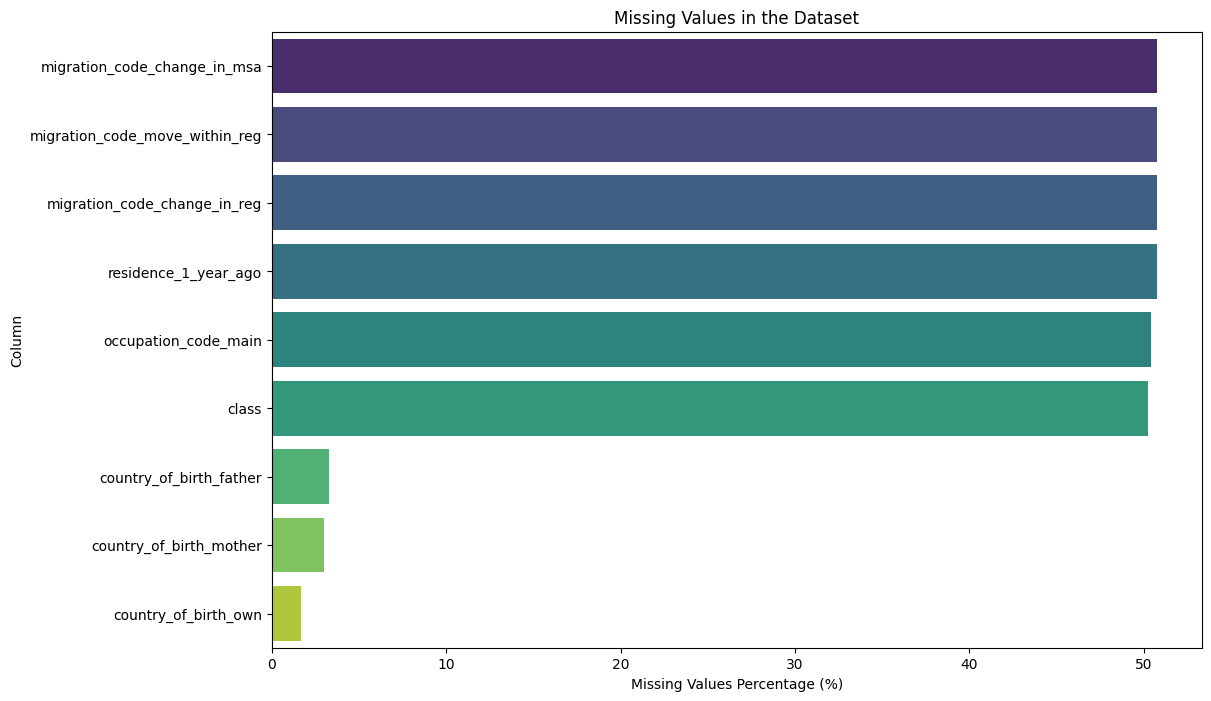

In [21]:
missing_values_analysis(df_test)

In [22]:
df["class"].unique()

array([nan, 'Federal government', 'Private', 'Local government',
       'Self-employed-incorporated', 'Self-employed-not incorporated',
       'State government', 'Without pay', 'Never worked'], dtype=object)

In [23]:
df["class"].value_counts()

class
Private                           75617
Self-employed-not incorporated     8957
Local government                   8093
State government                   4480
Self-employed-incorporated         3444
Federal government                 3047
Never worked                        449
Without pay                         167
Name: count, dtype: int64

In [24]:
# Filter rows where age is less than 18
filtered_df = df[df["age"] < 18]
filtered_df

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
3,ID_TZ0003,2,Female,Children,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,unchanged,unchanged,Same,1380.27,Below limit
11,ID_TZ0011,4,Male,Children,NaN,Never married,Black,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,US,US,unchanged,unchanged,unchanged,Same,1944.73,Below limit
13,ID_TZ0013,16,Female,9th grade,NaN,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,2,Nonfiler,0,0,0,Native,94,US,US,US,unchanged,unchanged,unchanged,Same,2684.64,Below limit
16,ID_TZ0016,5,Female,Children,NaN,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,US,US,US,NaN,NaN,NaN,NaN,1340.44,Below limit
29,ID_TZ0029,14,Male,Children,NaN,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Secondary individual,Nonrelative of householder,0,Nonfiler,0,0,0,Native,95,US,US,US,NaN,NaN,NaN,NaN,1652.34,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209477,ID_TZ9998,8,Male,Children,NaN,Never married,Black,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,US,US,US,NaN,NaN,NaN,NaN,5585.64,Below limit
209481,ID_TZ99983,11,Male,Children,NaN,Never married,Black,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Grandchild <18 never marr not in subfamily,Other relative of householder,0,Nonfiler,0,0,0,Native,94,US,US,US,MSA to MSA,Different state in South,Different state same division,No,3245.09,Below limit
209483,ID_TZ99985,11,Male,Children,NaN,Never married,White,Mexican-American,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,US,Nicaragua,Mexico,NaN,NaN,NaN,NaN,896.19,Below limit
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,Never married,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,2,Nonfiler,0,0,0,Native,95,US,US,US,NaN,NaN,NaN,NaN,2170.60,Below limit


In [25]:
# Introduce a new variable "employment_status" in the "age" column
df['class'] = np.where(df['age'] < 18, 'Not eligible to work', df['class'])
df.head()

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,Widowed,White,All other,Not in labor force,0,0,52,0,Not in universe or children,0,NaN,2,Householder,Householder,2,Head of household,0,0,292,Native,95,US,US,US,NaN,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,Widowed,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,2,Single,0,0,0,Native,94,US,US,US,unchanged,unchanged,unchanged,Same,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,Never married,Black,All other,Children or Armed Forces,0,500,15,41,Hospital services,26,Adm support including clerical,4,Child 18+ never marr Not in a subfamily,Child 18 or older,2,Single,0,0,0,Native,94,US,US,US,unchanged,unchanged,unchanged,Same,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,Not eligible to work,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,unchanged,unchanged,Same,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,US,US,US,NaN,NaN,NaN,NaN,1580.79,Below limit


In [26]:
df["class"].unique()

array([nan, 'Federal government', 'Not eligible to work', 'Private',
       'Local government', 'Self-employed-incorporated',
       'Self-employed-not incorporated', 'State government',
       'Without pay', 'Never worked'], dtype=object)

In [27]:
df["class"].value_counts()

class
Private                           73388
Not eligible to work              58587
Self-employed-not incorporated     8827
Local government                   8001
State government                   4459
Self-employed-incorporated         3404
Federal government                 3035
Never worked                        193
Without pay                         146
Name: count, dtype: int64

In [28]:
df.head()

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,Widowed,White,All other,Not in labor force,0,0,52,0,Not in universe or children,0,NaN,2,Householder,Householder,2,Head of household,0,0,292,Native,95,US,US,US,NaN,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,Widowed,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,2,Single,0,0,0,Native,94,US,US,US,unchanged,unchanged,unchanged,Same,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,Never married,Black,All other,Children or Armed Forces,0,500,15,41,Hospital services,26,Adm support including clerical,4,Child 18+ never marr Not in a subfamily,Child 18 or older,2,Single,0,0,0,Native,94,US,US,US,unchanged,unchanged,unchanged,Same,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,Not eligible to work,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,unchanged,unchanged,Same,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,US,US,US,NaN,NaN,NaN,NaN,1580.79,Below limit


In [29]:
def impute_with_mode(df, column_name):
    imputation_value = df[column_name].mode()[0]
    df[column_name].fillna(imputation_value, inplace=True)

# Impute 'class' column in the train dataset
impute_with_mode(df, 'class')

# Impute 'class' column in the test dataset
impute_with_mode(df_test, 'class')

# Verify the imputation in both DataFrames
missing_values_after_imputation_train = df['class'].isnull().sum()
missing_values_after_imputation_test = df_test['class'].isnull().sum()


In [30]:
df['occupation_code_main'].unique()

array([nan, 'Adm support including clerical', 'Other service',
       'Executive admin and managerial', 'Sales',
       'Machine operators assmblrs & inspctrs',
       'Precision production craft & repair', 'Professional specialty',
       'Handlers equip cleaners etc',
       'Transportation and material moving',
       'Farming forestry and fishing', 'Private household services',
       'Technicians and related support', 'Protective services',
       'Armed Forces'], dtype=object)

In [31]:
df['occupation_code_main'].value_counts()

occupation_code_main
Adm support including clerical           15351
Professional specialty                   14544
Executive admin and managerial           13107
Other service                            12856
Sales                                    12487
Precision production craft & repair      11207
Machine operators assmblrs & inspctrs     6650
Handlers equip cleaners etc               4340
Transportation and material moving        4244
Farming forestry and fishing              3273
Technicians and related support           3136
Protective services                       1700
Private household services                 878
Armed Forces                                32
Name: count, dtype: int64

In [32]:
df["occupation_code"].unique()

array([ 0, 26, 31,  2, 17, 36, 33,  8, 10, 40, 29, 39, 23, 34, 43, 38,  3,
       35, 19, 25, 27, 24, 30,  1, 32, 15,  5, 28, 37, 12,  4, 16,  7, 14,
       44, 18, 13,  9, 42, 21, 41, 22, 11, 45,  6, 20, 46], dtype=int64)

In [33]:
# Filter rows where age is less than 18 and class is missing
missing_occupation = df[(df["occupation_code"] == 0) & df["occupation_code_main"].isnull()]
missing_occupation.head()

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Private,Widowed,White,All other,Not in labor force,0,0,52,0,Not in universe or children,0,NaN,2,Householder,Householder,2,Head of household,0,0,292,Native,95,US,US,US,NaN,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,Private,Widowed,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,2,Single,0,0,0,Native,94,US,US,US,unchanged,unchanged,unchanged,Same,2366.75,Below limit
3,ID_TZ0003,2,Female,Children,Not eligible to work,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,unchanged,unchanged,Same,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Private,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,US,US,US,NaN,NaN,NaN,NaN,1580.79,Below limit
8,ID_TZ0008,73,Female,7th and 8th grade,Private,Married-civilian spouse present,Black,All other,Not in labor force,0,0,1,0,Not in universe or children,0,NaN,3,Spouse of householder,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,US,US,US,NaN,NaN,NaN,NaN,1267.30,Below limit


In [34]:
# Filter rows where df["occupation_code"] != 0) and class is missing
not_missing_occupation = df[(df["occupation_code"] != 0) & df["occupation_code_main"].isnull()]
not_missing_occupation.head()

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit


In [35]:
df['occupation_code_main'].fillna('Unknown', inplace=True)
df_test['occupation_code_main'].fillna('Unknown', inplace=True)

In [36]:
# List of columns to drop
columns_to_drop = ['migration_code_change_in_msa', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago']

df.drop(columns=columns_to_drop, inplace=True)
df_test.drop(columns=columns_to_drop, inplace=True)

In [37]:
df = df.dropna()
df_test = df_test.dropna()

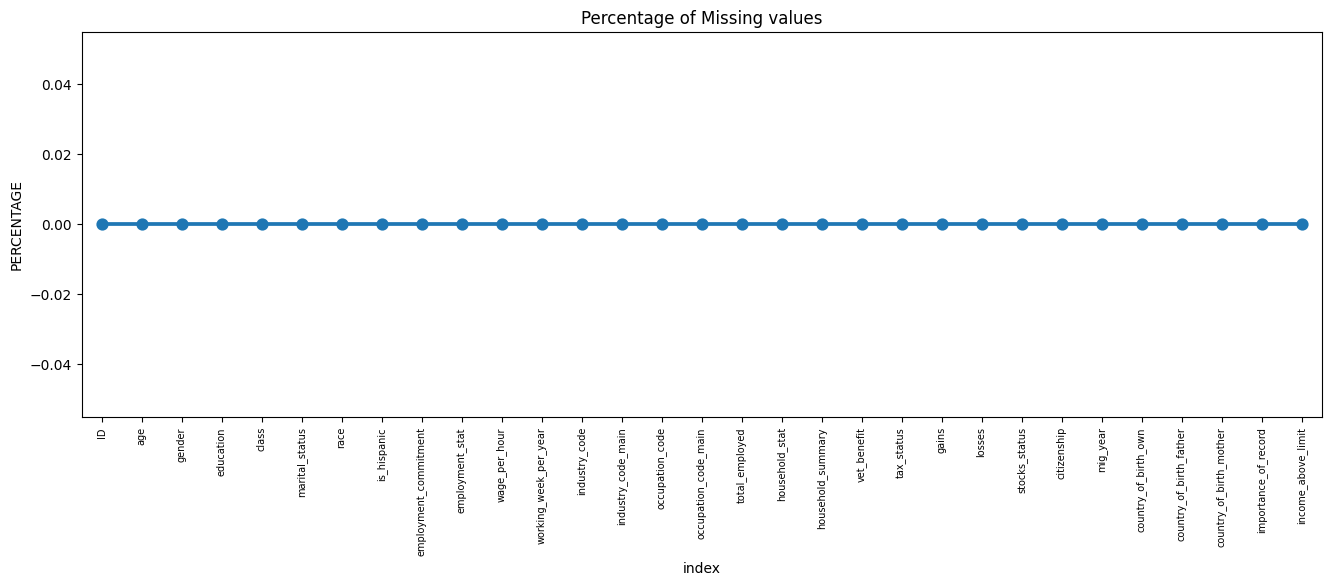

In [38]:
def visualize_missing_percentage(df):
    missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()

    # Plot the percentage of missing values
    plt.figure(figsize=(16, 5))
    ax = sns.pointplot(x='index', y=0, data=missing)
    plt.xticks(rotation=90, fontsize=7)
    plt.title("Percentage of Missing values")
    plt.ylabel("PERCENTAGE")
    plt.show()
    
visualize_missing_percentage(df)

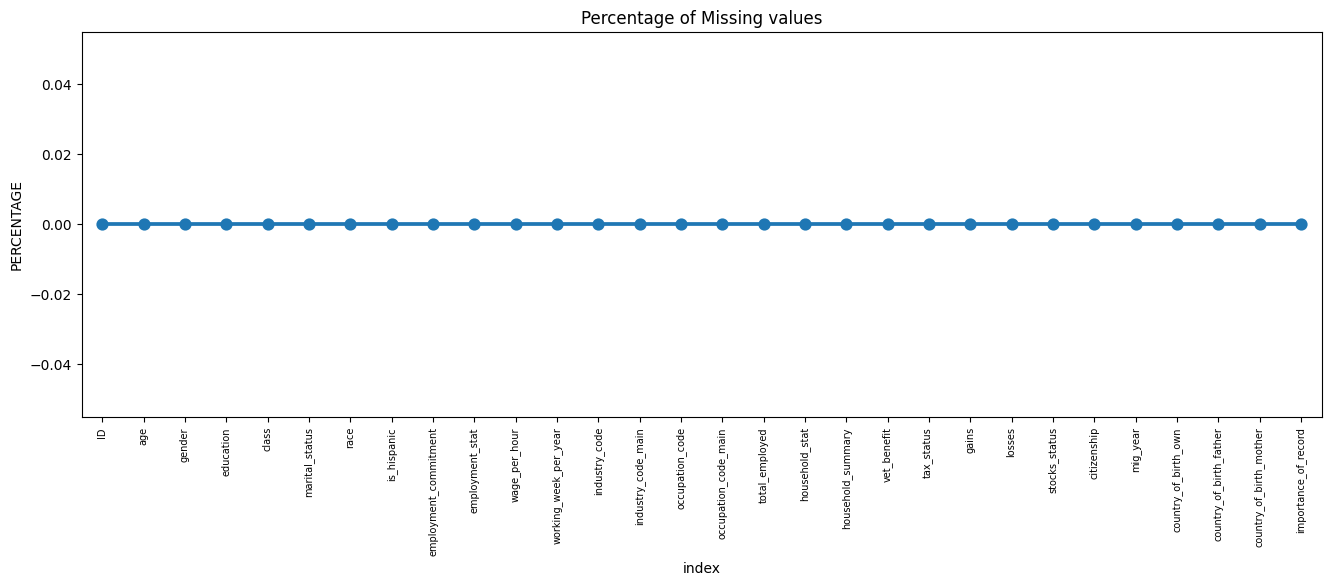

In [39]:
visualize_missing_percentage(df_test)

__All missing values have been handled in both datasets__

In [40]:
df['education'].unique()

array(['High school graduate', '12th grade no diploma', 'Children',
       '7th and 8th grade', '11th grade', '9th grade',
       'Masters degree(MA MS MEng MEd MSW MBA)',
       'Bachelors degree(BA AB BS)', '10th grade',
       '1st 2nd 3rd or 4th grade', 'Some college but no degree',
       'Less than 1st grade', 'Associates degree-occup /vocational',
       'Associates degree-academic program',
       'Prof school degree (MD DDS DVM LLB JD)', '5th or 6th grade',
       'Doctorate degree(PhD EdD)'], dtype=object)

In [41]:
def map_education_categories(df):
    # Mapping for education categories
    education_mapping = {
        'Elementary': ['less than 1st grade', '1st 2nd 3rd or 4th grade', '5th or 6th grade'],
        'Middle School': ['7th and 8th grade'],
        'High School': ['9th grade', '10th grade', '11th grade', '12th grade no diploma', 'high school graduate'],
        'College Dropout': ['some college but no degree'],
        'Associates Degree': ['associates degree-occup /vocational', 'associates degree-academic program'],
        'Bachelors Degree': ['bachelors degree(ba ab bs)'],
        'Masters': ['masters degree(ma ms meng med msw mba)'],
        'Professional Degree': ['prof school degree (md dds dvm llb jd)'],
        'Doctorate': ['doctorate degree(phd edd)'],
        'Other': ['children'],
    }
    # Map citizenship names to new categories
    citizenship_mapping = {
        'Foreign born- Not a citizen of U S': 'foreigner',
        'Foreign born- U S citizen by naturalization': 'citizen',
        'Native': 'citizen',
        'Native- Born abroad of American Parent(s)': 'citizen',
        'Native- Born in Puerto Rico or U S Outlying': 'citizen'
    }

    # Update the 'citizenship' column with the new categories
    df['citizenship'] = df['citizenship'].map(citizenship_mapping)

    df['citizenship'].unique()
    
    # Apply the mapping to the 'education' column
    df['education'] = df['education'].apply(lambda x: next((k for k, v in education_mapping.items() if x.lower() in v), 'Unknown'))

    df['education'].unique()
    
    return df
map_education_categories(df)

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High School,Private,Widowed,White,All other,Not in labor force,0,0,52,0,Not in universe or children,0,Unknown,2,Householder,Householder,2,Head of household,0,0,292,Citizen,95,US,US,US,1779.74,Below limit
1,ID_TZ0001,65,Female,High School,Private,Widowed,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,Unknown,0,Nonfamily householder,Householder,2,Single,0,0,0,Citizen,94,US,US,US,2366.75,Below limit
2,ID_TZ0002,21,Male,High School,Federal government,Never married,Black,All other,Children or Armed Forces,0,500,15,41,Hospital services,26,Adm support including clerical,4,Child 18+ never marr Not in a subfamily,Child 18 or older,2,Single,0,0,0,Citizen,94,US,US,US,1693.42,Below limit
3,ID_TZ0003,2,Female,Other,Not eligible to work,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,Unknown,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Citizen,94,US,India,India,1380.27,Below limit
4,ID_TZ0004,70,Male,High School,Private,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,Unknown,0,Spouse of householder,Spouse of householder,2,Joint both 65+,0,0,0,Citizen,95,US,US,US,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,Middle School,Not eligible to work,Never married,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,Unknown,0,Child <18 never marr not in subfamily,Child under 18 never married,2,Nonfiler,0,0,0,Citizen,95,US,US,US,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors Degree,Private,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,Unknown,0,Householder,Householder,2,Joint both 65+,0,0,71,Citizen,95,US,US,Canada,1029.57,Below limit
209496,ID_TZ99997,8,Female,Other,Not eligible to work,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,Unknown,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Citizen,95,US,US,US,791.61,Below limit
209497,ID_TZ99998,26,Female,College Dropout,Private,Married-civilian spouse present,White,All other,Children or Armed Forces,0,700,52,32,Wholesale trade,42,Handlers equip cleaners etc,4,Spouse of householder,Spouse of householder,2,Joint both under 65,0,0,0,Citizen,94,US,US,US,3530.26,Below limit


In [42]:
map_education_categories(df_test)

,ID,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record
0,ID_TZ209499,54,Male,High School,Private,Married-civilian spouse present,White,All other,Children or Armed Forces,0,600,46,29,Transportation,38,Transportation and material moving,2,Householder,Householder,2,Joint both under 65,0,0,0,Citizen,94,US,US,US,3388.96
1,ID_TZ209500,53,Male,Elementary,Private,Married-civilian spouse present,White,Central or South American,Full-time schedules,0,0,52,5,Manufacturing-durable goods,37,Machine operators assmblrs & inspctrs,4,Householder,Householder,2,Joint both under 65,0,0,0,Foreigner,95,El-Salvador,El-Salvador,El-Salvador,1177.55
2,ID_TZ209501,42,Male,Bachelors Degree,Private,Married-civilian spouse present,White,All other,Full-time schedules,1,0,44,37,Business and repair services,4,Professional specialty,5,Householder,Householder,2,Joint both under 65,15024,0,500,Citizen,95,US,US,US,4898.55
3,ID_TZ209502,16,Female,High School,Private,Never married,White,All other,Children or Armed Forces,0,0,8,0,Not in universe or children,0,Unknown,6,Child <18 never marr not in subfamily,Child under 18 never married,2,Single,0,0,0,Citizen,94,US,US,US,1391.44
4,ID_TZ209503,16,Male,High School,Private,Never married,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,Unknown,0,Child <18 never marr not in subfamily,Child under 18 never married,2,Nonfiler,0,0,0,Citizen,95,US,US,US,1933.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89781,ID_TZ299280,5,Male,Other,Private,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,Unknown,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Citizen,95,US,US,US,938.83
89782,ID_TZ299281,81,Female,Middle School,Private,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,Unknown,0,Spouse of householder,Spouse of householder,2,Joint both 65+,0,0,0,Citizen,95,US,US,US,1985.66
89783,ID_TZ299282,65,Female,High School,Federal government,Married-civilian spouse present,White,Other Spanish,Children or Armed Forces,0,0,52,46,Forestry and fisheries,31,Other service,6,Spouse of householder,Spouse of householder,2,Joint one under 65 & one 65+,0,0,0,Citizen,94,US,US,US,552.74
89784,ID_TZ299283,38,Female,High School,Private,Married-A F spouse present,White,All other,Full-time schedules,2,0,43,33,Retail trade,19,Sales,3,Spouse of householder,Spouse of householder,2,Joint both under 65,0,0,0,Citizen,95,US,US,US,1917.71


# __Univariate, Bivariate and Multivariate Analysis__
## Univariate Analysis

In [43]:
df.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'marital_status', 'race',
       'is_hispanic', 'employment_commitment', 'employment_stat',
       'wage_per_hour', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [44]:
income_df=df['income_above_limit'].value_counts(normalize=True)
income_df

income_above_limit
Below limit    0.93886
Above limit    0.06114
Name: proportion, dtype: float64

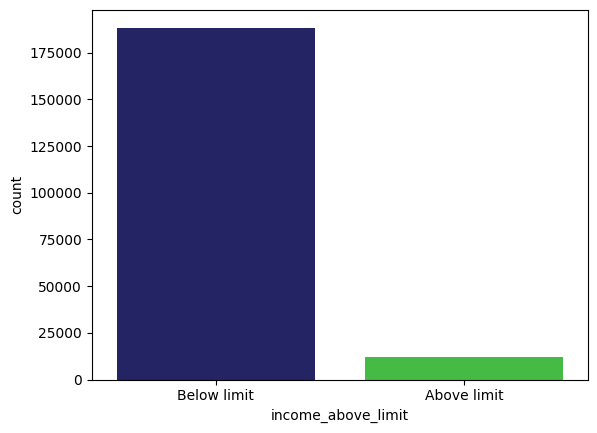

In [45]:
sns.countplot(data=df, x='income_above_limit', palette=['midnightblue', 'limegreen'])
plt.show()

Insights for the Distribution of Income :
- There are 12998 participants with income above 50k (Above Limit) and 196501 below 50k (Below Limit).
This reveals a significant class imbalance, with a relatively small number of participants in the high-income category compared to the low-income category. This significant disparity in class distribution may have implications for modeling and predictive accuracy. Class imbalances can lead to models that are biased toward the majority class, potentially impacting the model's ability to accurately predict the minority class (Above Limit). Addressing this class imbalance through techniques like oversampling, undersampling, or using appropriate evaluation metrics will be important in building a robust income prediction model.

In [46]:
gender_df=df['gender'].value_counts(normalize=True)
gender_df

gender
Female    0.519194
Male      0.480806
Name: proportion, dtype: float64

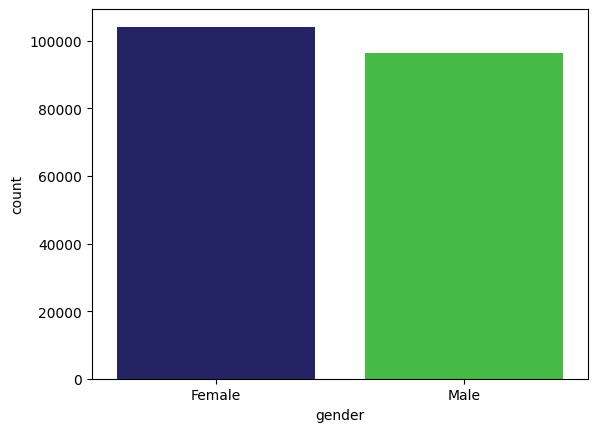

In [47]:
sns.countplot(data=df, x='gender', palette=['midnightblue', 'limegreen'])
plt.show()

__There are more females than males in the dataset__

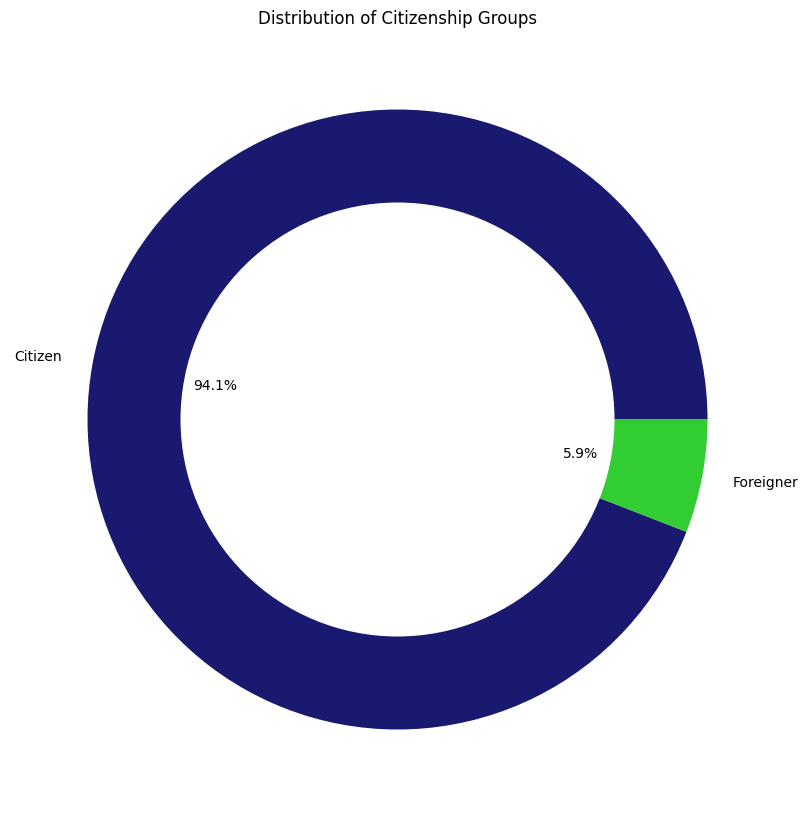

In [53]:
# Plot a donut chart with viridis blue and green
palette=['midnightblue', 'limegreen']
plt.figure(figsize=(10,12))
plt.pie(df['citizenship'].value_counts(), labels=df['citizenship'].value_counts().index, autopct='%1.1f%%', colors=palette)
plt.title('Distribution of Citizenship Groups')
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))
plt.show()

__Majority of the workers are legal USA citizens, while 5.9% makes up foreigners__

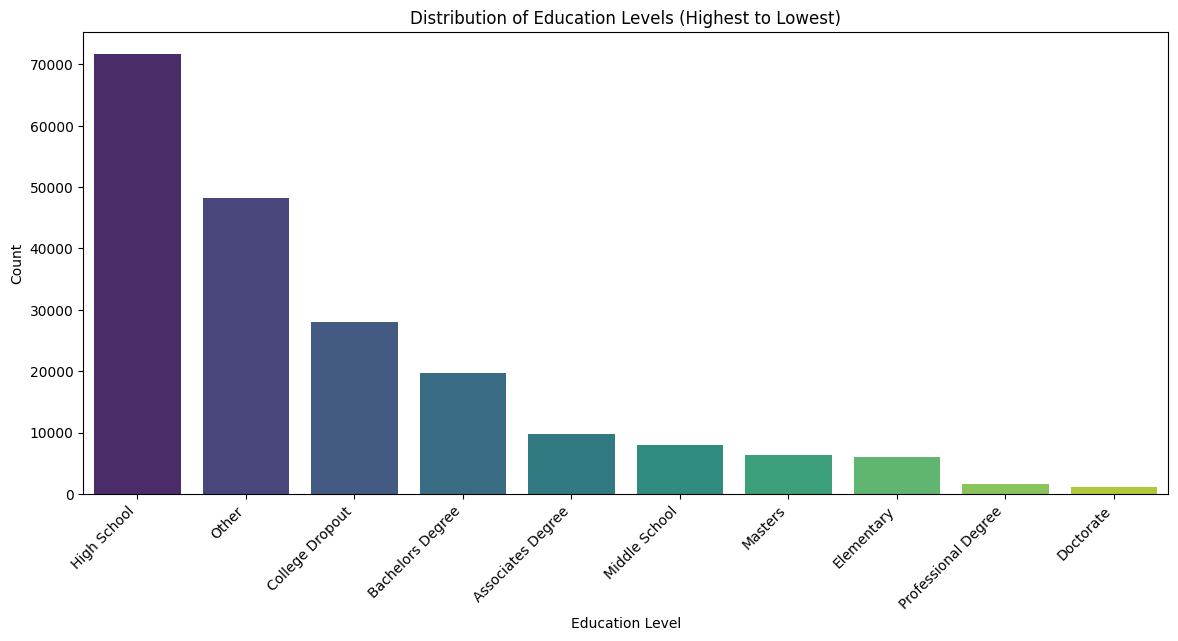

In [71]:
# Calculate the count of each category in 'education' and sort by count
education_counts = df['education'].value_counts().sort_values(ascending=False)

# Countplot for 'education' arranged from highest to lowest count
plt.figure(figsize=(14, 6))
sns.countplot(x='education', data=df, order=education_counts.index, palette='viridis')
plt.title('Distribution of Education Levels (Highest to Lowest)')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

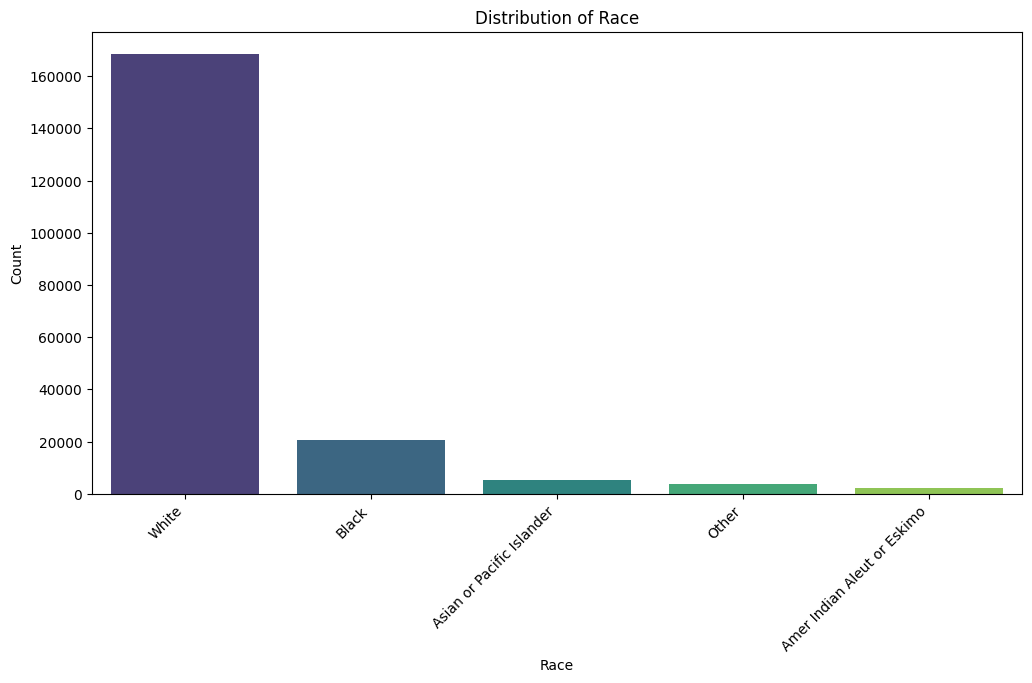

In [67]:
# Calculate the count of each category in 'race'
race_counts = df['race'].value_counts()

# Countplot for 'race'
plt.figure(figsize=(12, 6))
sns.countplot(x='race', data=df, order=race_counts.index, palette='viridis')
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

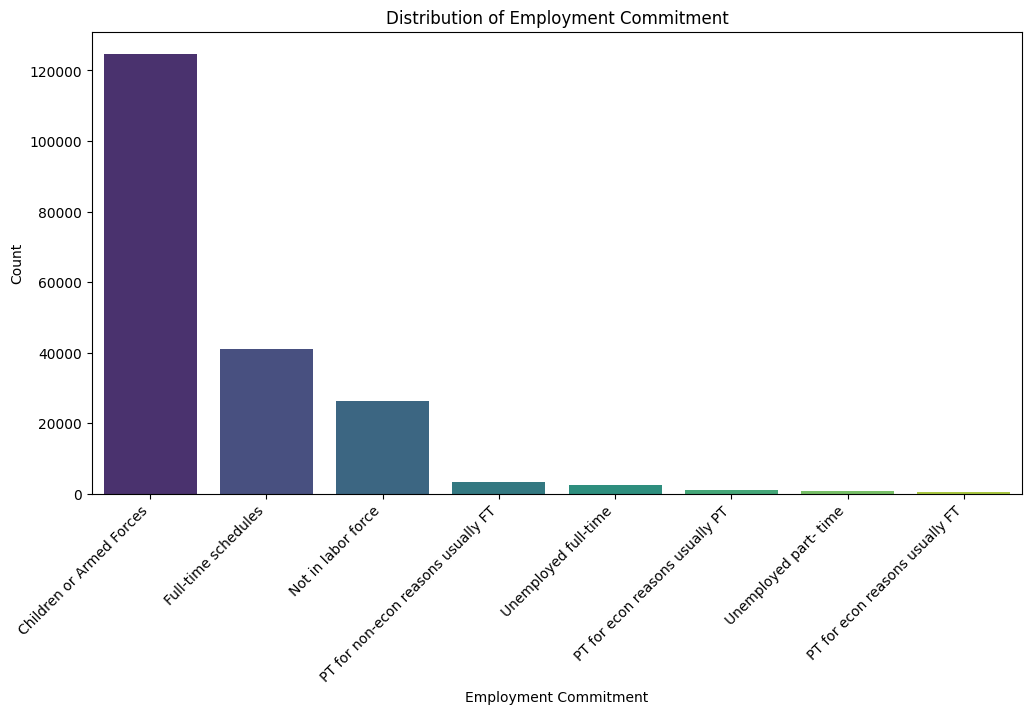

In [68]:
# Calculate the count of each category in 'employment_commitment'
employment_commitment_counts = df['employment_commitment'].value_counts()

# Countplot for 'employment_commitment'
plt.figure(figsize=(12, 6))
sns.countplot(x='employment_commitment', data=df, order=employment_commitment_counts.index, palette='viridis')
plt.title('Distribution of Employment Commitment')
plt.xlabel('Employment Commitment')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

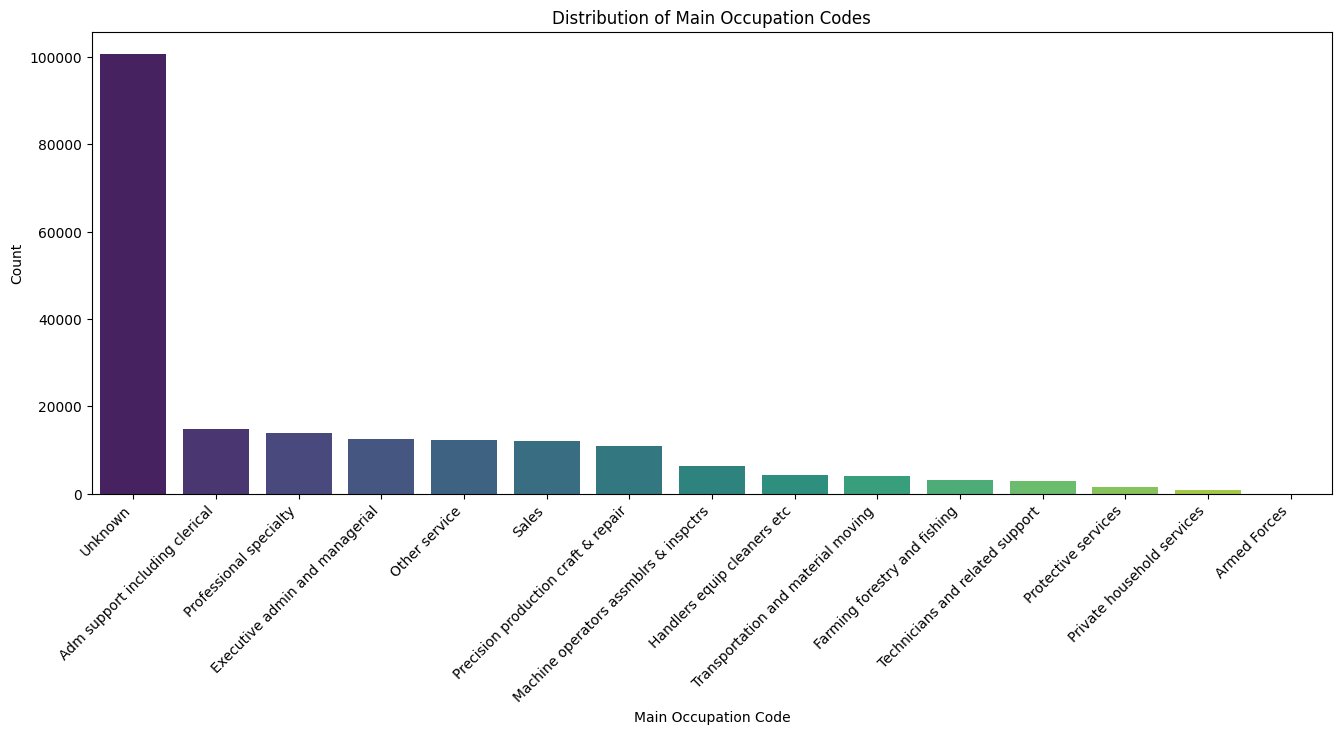

In [69]:
# Calculate the count of each category in 'occupation_code_main'
occupation_code_main_counts = df['occupation_code_main'].value_counts()

# Countplot for 'occupation_code_main'
plt.figure(figsize=(16, 6))
sns.countplot(x='occupation_code_main', data=df, order=occupation_code_main_counts.index, palette='viridis')
plt.title('Distribution of Main Occupation Codes')
plt.xlabel('Main Occupation Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

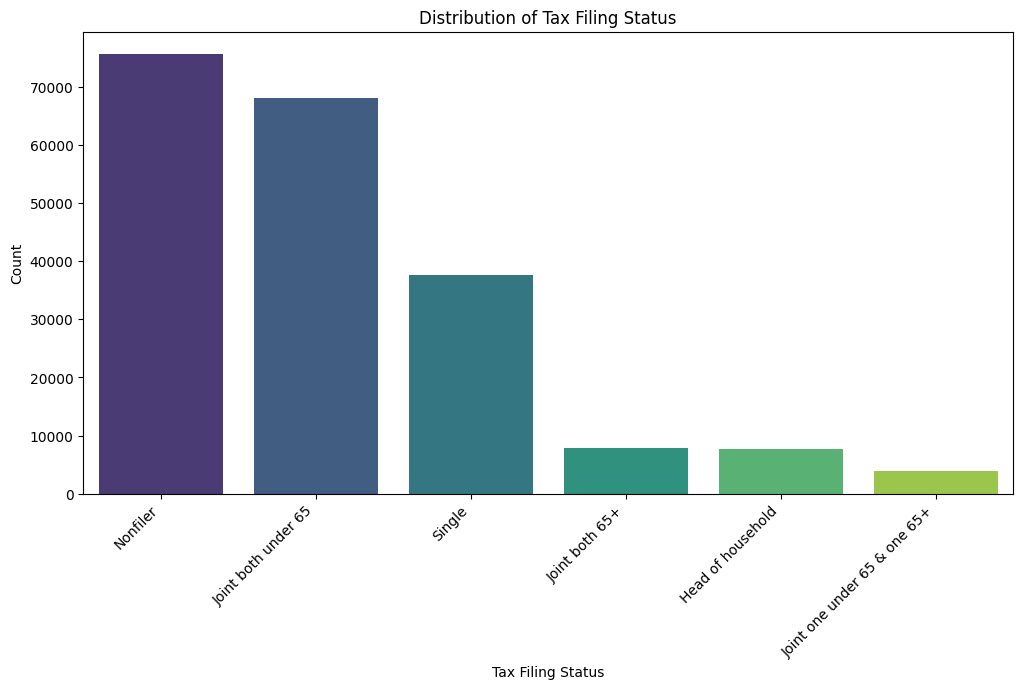

In [70]:
# Calculate the count of each category in 'tax_status'
tax_status_counts = df['tax_status'].value_counts()

# Countplot for 'tax_status'
plt.figure(figsize=(12, 6))
sns.countplot(x='tax_status', data=df, order=tax_status_counts.index, palette='viridis')
plt.title('Distribution of Tax Filing Status')
plt.xlabel('Tax Filing Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

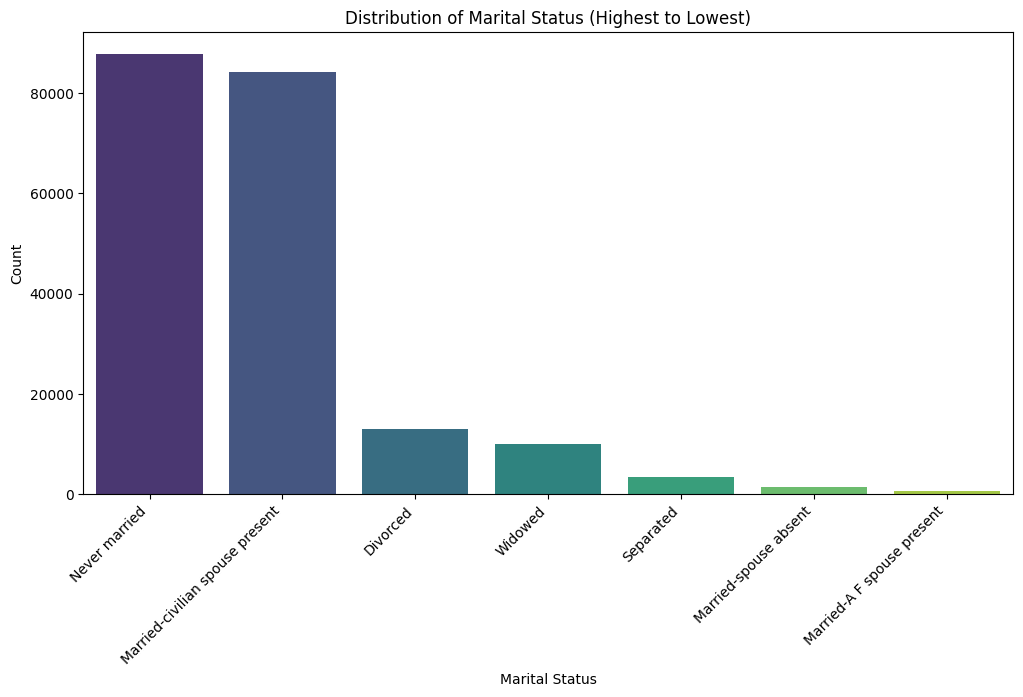

In [66]:
# Calculate the count of each category in 'marital_status' and sort by count
marital_status_counts = df['marital_status'].value_counts().sort_values(ascending=False)

# Countplot for 'marital_status' arranged from highest to lowest count
plt.figure(figsize=(12, 6))
sns.countplot(x='marital_status', data=df, order=marital_status_counts.index, palette='viridis')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## __Bivariate analysis__

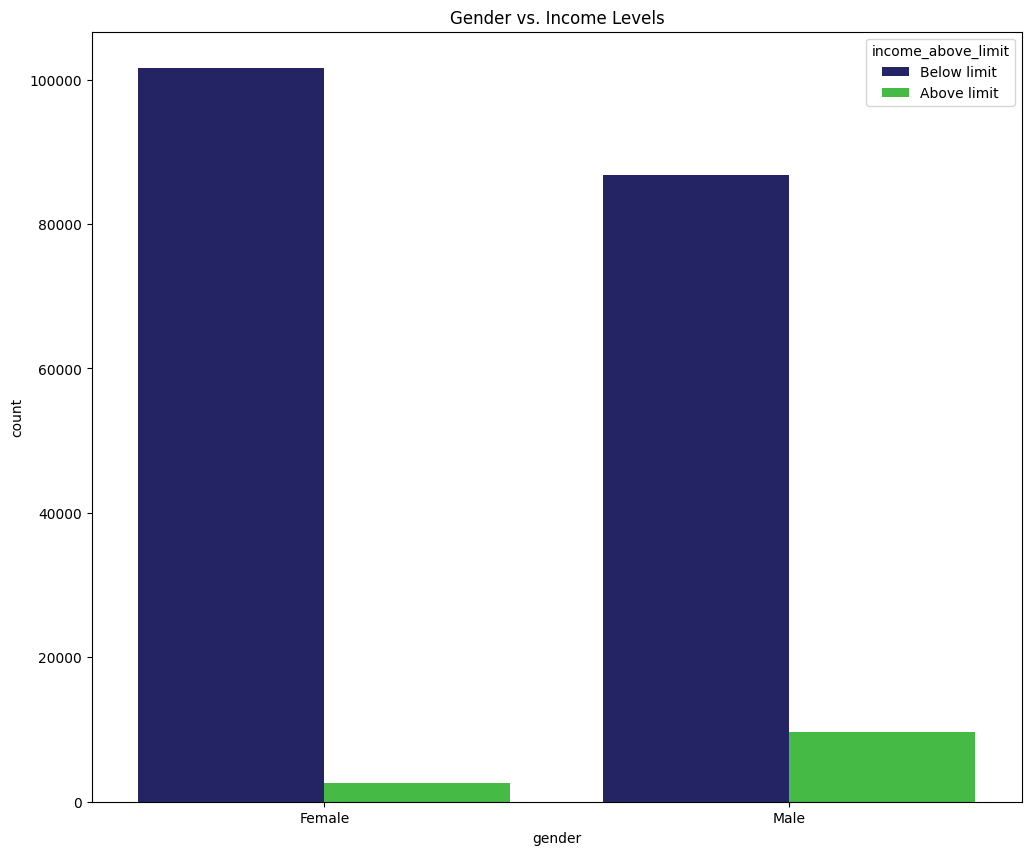

In [75]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df,x='gender', hue='income_above_limit', palette=['midnightblue', 'limegreen'])
plt.title('Gender vs. Income Levels')
plt.show()

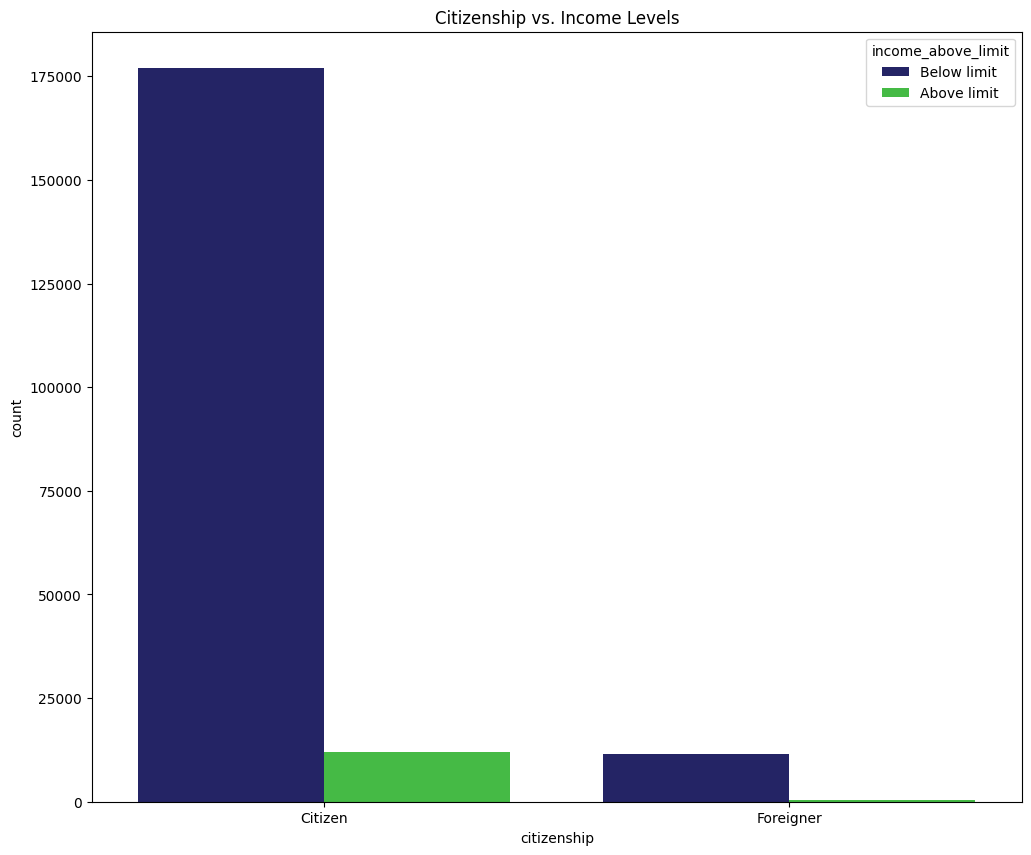

In [77]:
# Countplot for Citizenship Status and Income Levels
plt.figure(figsize=(12, 10))
sns.countplot(x='citizenship', hue='income_above_limit', data=df, palette=['midnightblue', 'limegreen'])
plt.title('Citizenship vs. Income Levels')
plt.show()

## Multivariate Analysis

In [78]:
# Encoding the target variable
df['income_mapped'] = df['income_above_limit'].map({'Below limit': 0, 'Above limit': 1})
df_corr = df.corr(numeric_only=True)

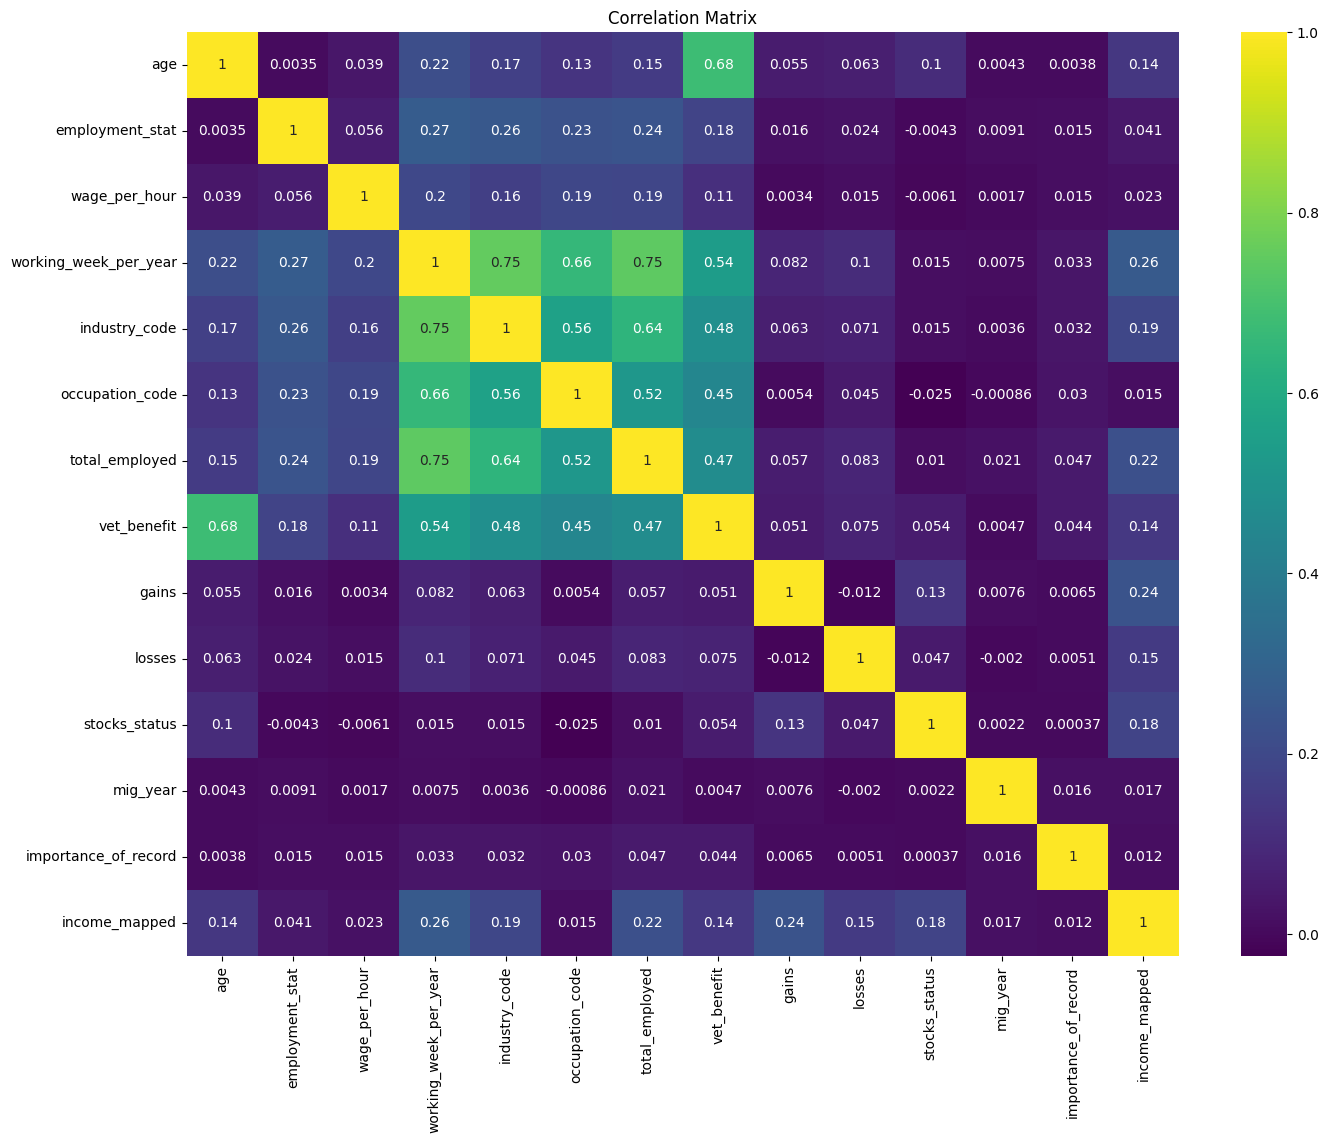

In [80]:
# Create heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(data=df_corr, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

## __Hypothesis__
Null Hypothesis (H0): There's no clear connection between how much education someone has and the chance of making more money than a certain amount.

Alternative Hypothesis (H1): People with more education are much more likely to earn above that certain amount.

In [83]:
# Create a contingency table 
contingency_table = pd.crosstab(df['education'], df['income_above_limit'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Determine the significance level
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis")
    print("People with more education are much more likely to earn above that certain amount.")
else:
    print("Fail to reject the null hypothesis")
    print("There's no clear connection between how much education someone has and the chance of making more money than a certain amount")

Chi-square value: 30485.389151596108
P-value: 0.0
Reject the null hypothesis
People with more education are much more likely to earn above that certain amount.


## Chi-square Test Result

### Chi-square Value: 30485.39
The Chi-square value is a statistical measure obtained from the Chi-square test. In this case, the value is calculated to be 30485.39.

### P-value: 0.0
The P-value is a crucial indicator of the test's significance. A P-value of 0.0 suggests an extremely low probability of observing the data if the null hypothesis were true.

### Interpretation:
The Chi-square test was conducted to analyze the association between an individual's education level and the likelihood of earning above a certain threshold. The obtained Chi-square value of 30485.39 and a P-value of 0.0 indicate a statistically significant relationship.

### Conclusion:
With a P-value close to zero, we reject the null hypothesis. This leads to the conclusion that there is a significant association between an individual's education level and the likelihood of earning above the specified income threshold. The evidence suggests that people with higher education levels are much more likely to have incomes above the specified threshold.


## Research Questions

1. What percentage of individuals in the dataset have incomes above $50,000, and conversely, what percentage have incomes below $50,000?

2. How does age correlate with income levels in the dataset? Are older individuals more likely to have higher incomes?

3. Are self-employed individuals more likely to have higher incomes compared to those working for employers?

4. What is the income distribution among unemployed individuals in the dataset?

5. Do higher education levels correspond to a higher likelihood of having incomes above the specified threshold?

6. How does age relate to income levels in the dataset? Is there a trend suggesting that older individuals have higher incomes?

7. Is there a significant gender-based income disparity in the dataset?

8. Are there differences in employment status between the two income groups (above and below $50,000)?

9. How do race and ethnicity correlate with income levels in the dataset?

10. Is citizenship status associated with income levels in the dataset?

11. What is the relationship between occupation and income categories in the dataset?

12. How does tax status correspond to income levels in the dataset?

<b>Class imbalance </b> <br>


We will be seeing the class imbalance using value_counts() method of pandas dataframe and use histogram to plot the imbalances
<hr>

In [51]:
print('The class Imbalance in the data is given below')
display(train_data['income_above_limit'].value_counts())
print('---------------------------------------------------------------\n')
print('The class imbalance in terms of percentage is given below ')
display(train_data['income_above_limit'].value_counts(normalize=True))
print('----------------------------------------------------------------\n')
pct_df = pd.DataFrame(train_data['income_above_limit'].value_counts(normalize=True)).reset_index().rename({'index':'Target_values','income_above_limit':'Percentage'},axis=1)
fig = px.bar(pct_df,x='Target_values',y='Percentage', height=400,width = 400,title='class imbalance')
fig.show()

The class Imbalance in the data is given below


NameError: name 'train_data' is not defined

Clearly we have a highly imbalanced dataset available with us and hence we need to perform steps to mitigate the imbalance accordingly. The following methods could be used:- 
1. Downsample the majority class (Here majority class is 'Below limit') 
2. Upsample the minority class (Here, minority class is 'Above limit') 
3. Use class weights while performing model development <br>
Reference : https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html



<b> NaN value analysis </b> 


In [ ]:
def nan_value_plot(df):
    nan_dict  = {}
    for cols in df.columns:
        nan_dict[cols] = df[cols].isna().sum()/df.shape[0]
    nan_pct_df = pd.DataFrame.from_dict(nan_dict,orient='index').reset_index().rename({'index':'Columns',0:'NaN_pct'},axis=1)
    fig = px.bar(nan_pct_df,x='Columns',y='NaN_pct', height=400,width = 400,title='NaN value percentage in each column')
    fig.update_layout(
                        xaxis = dict(
                        tickfont = dict(size=5)))
    fig.show()    

In [ ]:
print(colored('We see the distribution of NaN values in train data as below','green',attrs=['bold']))
nan_value_plot(train_df)

print('-------------------------------------------------------------------------------------------------')
print('\n')
print(colored('We see the distribution of NaN values in test data as below','blue',attrs=['bold']))
nan_value_plot(test_df)

<b> Comments:- </b>
* There are columns with extremely high proportion of NaN values, we may drop them. 
* There are columns with NaN values that can be handled easily using imputations with mean, median (in case of numerical) or mode(in case of categorical) 
* Use Models like LightGBM, CatBoost or XGBoost that handles the NaN values implicitly while model training. 
* Observe that the proportion of NaN value distribution is same in train and test and select NaN value handling techniques accordingly. 
* Be creative 🧠 (but also be logical 😉) !!



I will personally drop all the columns where the proportion of NaN values is above 80% and proceed with columns/features that are left. 

In [ ]:
nan_cols_drop  = []
for cols in test_df.columns:
    if test_df[cols].isna().sum()/test_df.shape[0] >0.8:
        nan_cols_drop.append(cols)

In [ ]:
print(colored(f'We will drop the following columns from both train and test data: ','yellow',attrs=['bold']))
print(nan_cols_drop)

In [ ]:
print('The shape of train and test data before dropping columns with high proportion of NaN values is - ')
print(colored(f'The shape of train data is    {train_df.shape}     ','green',attrs=['bold']))

print(colored(f'The shape of target column is {target_column.shape}','green',attrs=['bold']))

print(colored(f'The shape of test data is     {test_df.shape}      ','blue',attrs=['bold']))

train_df = train_df.drop(nan_cols_drop,axis=1)
test_df  = test_df.drop(nan_cols_drop,axis=1)

print('---------------------------------------------------------------------------------------------------')
print('The shape of train and test data after dropping columns with high proportion of NaN values is - ')
print(colored(f'The shape of train data is    {train_df.shape}     ','green',attrs=['bold']))

print(colored(f'The shape of target column is {target_column.shape}','green',attrs=['bold']))

print(colored(f'The shape of test data is     {test_df.shape}      ','blue',attrs=['bold']))

### Simple Baseline Validation strategy 

We will now do an 80-20 split of train data provided. As discussed previously, the participants are free to use the validation strategy of their own choice. 

Points to consider while selecting a validation strategy:
* Make sure the model is not overfitting on train data. 
* CV score and leaderboard scores are in sync. 
* Stable validation strategy when using K Folds etc. 

In [ ]:
train, X_test, train_y, y_test = train_test_split(train_df, target_column, test_size=0.2, random_state=42,stratify=target_column)

### Model development 🤖 💻 🤖

We will be straight away using a CatBoost model for training because it handles categorical features well, can implicitly handle NaN values, and can give a quick baseline (with minimal preprocessing) which can be used as a benchmark to be improved upon. 

<br>

In the below steps, we will convert all the categorical columns to string datatype and capture the indices where string datatype is present which will then be used as an input for the CatBoost Classification model. 

In [ ]:
cat_cols_index = np.where(train_df.dtypes=='object')[0]
for i in range(len(train_df.columns)):
    if i in cat_cols_index:
        train[train_df.columns[i]]   = train[train_df.columns[i]].astype(str)
        X_test[train_df.columns[i]]  = X_test[train_df.columns[i]].astype(str)
        test_df[train_df.columns[i]] = test_df[train_df.columns[i]].astype(str)

In [ ]:
model           = CatBoostClassifier(random_state=42,n_estimators =50 )
_               = model.fit(train,train_y,cat_features= cat_cols_index)


Parameter tuning tips for CatBoost:

👓 Do focus on parameters like n_estimators, max_depth, reg_lambda, reg_alpha, scale_pos_weight, learning_rate and explore other parameters from the link : https://catboost.ai/en/docs/references/training-parameters/


In [ ]:
acc_valid = accuracy_score(model.predict(X_test),y_test)

print(colored(f'The accuracy attained on the validation set is {acc_valid}','green',attrs=['bold']))



We got a good enough accuracy but is our model really performing that good ?? 🤔

👓 Consider the class imbalance of the data given with respect to the metric assigned. We can get 94% accuracy just by classifying everything as 'Below limit' but that will mean that we must get an accuracy above 94% to ensure the models are learning properly. 👓 

🔭 Let's investigate the classification report for both train and validation data and see how good the baseline is. 

In [ ]:
print('\n')
print('The classification report only on the validation data is below-')
print(colored(classification_report(y_test, model.predict(X_test)),'blue',attrs=['bold']))

print('The classification report only on the train data is below-')
print(colored(classification_report(train_y, model.predict(train)),'green',attrs=['bold']))

The performance of our minority class in terms of precision and recall is too low. Hence our F1 score is also very low. 



### A little hack 

Let's do a small hack though 🤓 🤓 🤓

We can use probability based thresholds and see how performance improves. We will select a lower threshold for class label 1.
The default threshold is 0.5 which means that if the probability of 1 is above 0.5, then the predicted class is 1 else it is 0.

<br>

We will lower the threshold to 0.4 and say that if the probability of class being 1 is above 0.4, then we can classify it as 1 and if it is less than 0.4, then it will be 0. 

In [ ]:
thresh     = 0.4
train_pred = np.where(model.predict_proba(train)[:,1]>thresh,1,0)
test_pred  = np.where(model.predict_proba(X_test)[:,1]>thresh,1,0)

print('\n')
print('The classification report only on the validation data is below-')
print(colored(classification_report(y_test,test_pred),'blue',attrs=['bold']))

print('The classification report only on the train data is below-')
print(colored(classification_report(train_y, train_pred),'green',attrs=['bold']))

We do see some improvement in the performance because the f1 score on our validation data moved from 0.58 to 0.61. 
For more information about how the threshold is selected, please follow [ROC Curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) of sklearn and in general how ROC curve works 📚 📚

### Submission Time 🎉

We will now predict on the test data given and see what score we get on leaderboard. 

We will now download the file "Sample_submission_1.csv" and submit it. 

In [ ]:
subdf                       = pd.read_csv('/content/SampleSubmission.csv')
subdf['income_above_limit'] = model.predict(test_df)
subdf.to_csv('Sample_submission_1.csv',index=False)
subdf['income_above_limit'].value_counts(normalize=True)

How to get better scores:
1. Feature engineering is the key. Refer to the variable dictionary and create meaningful features which can boost the score
2. Try out different models and categorical data preprocessing (read about categorical encoding) because a lot of features are categorical. 
3. Feature selection with feature importance 
4. Keep a check on classification report to observe overfitting and underfitting and select appropriate hyper-parameters to tune.
5. Suitable probability threshold selection as shown above. 
6. Be creative while selecting validation split 
For example:- Use Stratified K folds, grouped K folds, repeated stratified k folds, train test split with stratification etc 
7. Ensemble multiple models to get a stable prediction. 
8. Be creative and may the best model win 🏆 🏆 🏆